In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("housing.csv")

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [78]:
income_vs_price = df[["median_income","median_house_value"]].head(10).to_numpy()
income = income_vs_price[:,0]
price = income_vs_price[:,1]
price = price / 10000
print(f"income: {income}")
print(f"price: {price}")

income: [8.3252 8.3014 7.2574 5.6431 3.8462 4.0368 3.6591 3.12   2.0804 3.6912]
price: [45.26 35.85 35.21 34.13 34.22 26.97 29.92 24.14 22.67 26.11]


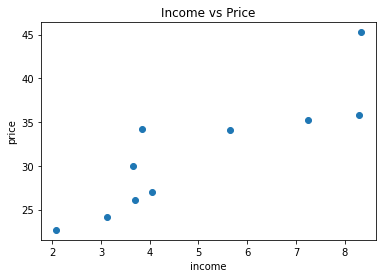

In [79]:
plt.scatter(income, price)
plt.title("Income vs Price")
plt.xlabel("income")
plt.ylabel("price")
plt.show()

In [80]:
epochs = 10000

w_init = 0
b_init = 0
alpha = 0.01
cost_list = []
for epoch in range(epochs):
    error_squared_list = []
    dj_dw_list = []
    dj_db_list = []
    for i in range(income.shape[0]):
        y_hat = w_init * income[i] + b_init
        error_squared = (y_hat - price[i]) ** 2
        error_squared_list.append(error_squared)
        dj_dw = (y_hat - price[i]) * income[i]
        dj_dw_list.append(dj_dw)
        dj_db = (y_hat - price[i])
        dj_db_list.append(dj_db)

    dj_dw_final = sum(dj_dw_list) / (len(dj_dw_list))
    dj_db_final = sum(dj_db_list) / (len(dj_db_list))
    cost = sum(error_squared_list) / (2 * len(error_squared_list))
    cost_list.append(cost)
    # print(f"cost: {cost}")
    # print(f"w: {w_init}")
    # print(f"b: {b_init}")
    # print(f"dj_dw: {dj_dw_final}")
    # print(f"dj_db: {dj_db_final}")
    w_init = w_init - alpha * dj_dw_final
    b_init = b_init - alpha * dj_db_final
print(f"cost: {cost}")

cost: 5.0781417396357735


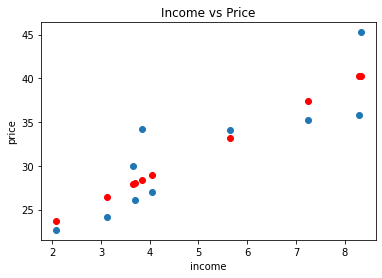

In [81]:
plt.scatter(income, price)
plt.scatter(income,w_init * income + b_init, c = 'red')
plt.title("Income vs Price")
plt.xlabel("income")
plt.ylabel("price")
plt.show()